In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# Load the dataset
file_path = './CO2 Emissions_Canada.csv'  # Replace with your dataset file path
data = pd.read_csv(file_path)

# Set seed for reproducibility
np.random.seed(0)

# Randomly select 100 samples from each of the three variables
sample_fuel_mpg = np.random.choice(data['Fuel Consumption Comb (mpg)'], 100)
sample_engine_size = np.random.choice(data['Engine Size(L)'], 100)
sample_cylinders = np.random.choice(data['Cylinders'], 100)

# Calculate means and standard deviations
mean_fuel_mpg = np.mean(sample_fuel_mpg)
std_fuel_mpg = np.std(sample_fuel_mpg, ddof=1)
mean_engine_size = np.mean(sample_engine_size)
std_engine_size = np.std(sample_engine_size, ddof=1)
mean_cylinders = np.mean(sample_cylinders)
std_cylinders = np.std(sample_cylinders, ddof=1)

# Hypothesis testing for Fuel Consumption Comb (mpg) vs Engine Size(L)
t_statistic_fuel_mpg_engine, p_value_fuel_mpg_engine = stats.ttest_ind(sample_fuel_mpg, sample_engine_size)
# Confidence Interval for Fuel Consumption Comb (mpg)
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical_fuel_mpg = stats.t.ppf(1 - alpha/2, df=len(sample_fuel_mpg)-1)
margin_of_error_fuel_mpg = t_critical_fuel_mpg * (std_fuel_mpg / np.sqrt(len(sample_fuel_mpg)))
confidence_interval_fuel_mpg = (mean_fuel_mpg - margin_of_error_fuel_mpg, mean_fuel_mpg + margin_of_error_fuel_mpg)

# Confidence Interval for Engine Size(L)
t_critical_engine = stats.t.ppf(1 - alpha/2, df=len(sample_engine_size)-1)
margin_of_error_engine = t_critical_engine * (std_engine_size / np.sqrt(len(sample_engine_size)))
confidence_interval_engine = (mean_engine_size - margin_of_error_engine, mean_engine_size + margin_of_error_engine)

# Hypothesis testing for Fuel Consumption Comb (mpg) vs Cylinders
t_statistic_fuel_mpg_cylinders, p_value_fuel_mpg_cylinders = stats.ttest_ind(sample_fuel_mpg, sample_cylinders)
# Confidence Interval for Cylinders
t_critical_cylinders = stats.t.ppf(1 - alpha/2, df=len(sample_cylinders)-1)
margin_of_error_cylinders = t_critical_cylinders * (std_cylinders / np.sqrt(len(sample_cylinders)))
confidence_interval_cylinders = (mean_cylinders - margin_of_error_cylinders, mean_cylinders + margin_of_error_cylinders)

# Print the results
print("Mean and SD for Fuel Consumption Comb (mpg):", mean_fuel_mpg, std_fuel_mpg)
print("Mean and SD for Engine Size(L):", mean_engine_size, std_engine_size)
print("Mean and SD for Cylinders:", mean_cylinders, std_cylinders)
print("T-test result for Fuel mpg vs Engine Size:", t_statistic_fuel_mpg_engine, p_value_fuel_mpg_engine)
print("Confidence Interval for Fuel Consumption Comb (mpg):", confidence_interval_fuel_mpg)
print("Confidence Interval for Engine Size(L):", confidence_interval_engine)
print("T-test result for Fuel mpg vs Cylinders:", t_statistic_fuel_mpg_cylinders, p_value_fuel_mpg_cylinders)
print("Confidence Interval for Cylinders:", confidence_interval_cylinders)


Mean and SD for Fuel Consumption Comb (mpg): 28.44 7.336528229663296
Mean and SD for Engine Size(L): 3.1919999999999993 1.3974493359205
Mean and SD for Cylinders: 5.62 1.983670712328408
T-test result for Fuel mpg vs Engine Size: 33.80628246368809 3.516581836907748e-84
Confidence Interval for Fuel Consumption Comb (mpg): (26.98427363214801, 29.895726367851992)
Confidence Interval for Engine Size(L): (2.9147157338791985, 3.4692842661208)
T-test result for Fuel mpg vs Cylinders: 30.026420809456475 1.2129963506315286e-75
Confidence Interval for Cylinders: (5.226396694638667, 6.013603305361333)


In [2]:
import numpy as np
import pandas as pd
from scipy import stats

# Set seed for reproducibility
np.random.seed(0)

# Randomly select 100 samples from each of the three variables
sample_fuel_mpg = np.random.choice(data['Fuel Consumption Comb (mpg)'], 100)
sample_engine_size = np.random.choice(data['Engine Size(L)'], 100)
sample_cylinders = np.random.choice(data['Cylinders'], 100)

# Correlation between Fuel Consumption Comb (mpg) and Engine Size(L)
correlation_fuel_mpg_engine, p_value_fuel_mpg_engine = stats.pearsonr(sample_fuel_mpg, sample_engine_size)

# Correlation between Fuel Consumption Comb (mpg) and Cylinders
correlation_fuel_mpg_cylinders, p_value_fuel_mpg_cylinders = stats.pearsonr(sample_fuel_mpg, sample_cylinders)

# Calculate the confidence intervals for the correlation coefficients
def correlation_ci(correlation, sample_size, confidence_level=0.95):
  z = np.arctanh(correlation)
  se = 1 / np.sqrt(sample_size - 3)
  z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)
  z_interval = z + np.array([-1, 1]) * z_critical * se
  return np.tanh(z_interval)

ci_fuel_mpg_engine = correlation_ci(correlation_fuel_mpg_engine, len(sample_fuel_mpg))
ci_fuel_mpg_cylinders = correlation_ci(correlation_fuel_mpg_cylinders, len(sample_fuel_mpg))

# Print the results
print("Correlation and p-value for Fuel Consumption Comb (mpg) vs Engine Size(L):", correlation_fuel_mpg_engine, p_value_fuel_mpg_engine)
print("Confidence Interval for correlation between Fuel Consumption Comb (mpg) and Engine Size(L):", ci_fuel_mpg_engine)
print("Correlation and p-value for Fuel Consumption Comb (mpg) vs Cylinders:", correlation_fuel_mpg_cylinders, p_value_fuel_mpg_cylinders)
print("Confidence Interval for correlation between Fuel Consumption Comb (mpg) and Cylinders:", ci_fuel_mpg_cylinders)


Correlation and p-value for Fuel Consumption Comb (mpg) vs Engine Size(L): 0.04891869777489392 0.6288641277793057
Confidence Interval for correlation between Fuel Consumption Comb (mpg) and Engine Size(L): [-0.14893042  0.24300193]
Correlation and p-value for Fuel Consumption Comb (mpg) vs Cylinders: 0.09419947495007781 0.35121943694964586
Confidence Interval for correlation between Fuel Consumption Comb (mpg) and Cylinders: [-0.10414559  0.28533813]


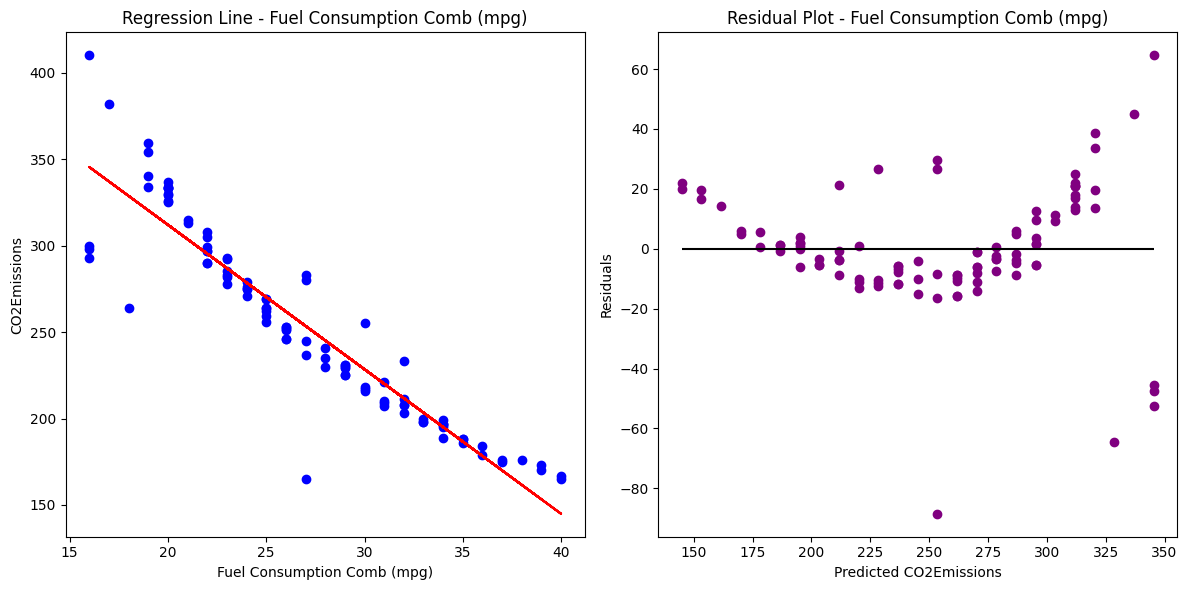

Linear Regression Equation: CO2 Emissions(g/km) = 479.0699 + -8.3539(Fuel Consumption Comb (mpg))
R-squared: 0.8646


In [6]:
# Cylinders as Predictor for CO2 Emissions

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = data
import matplotlib.pyplot as plt
sample_indices = np.random.choice(df.index, size=100, replace=False)

df = data
target_variable = df['CO2Emissions'].loc[sample_indices]


# Randomly select 100 samples for Cylinders and CO2 Emissions
sample_cylinders = df['Fuel Consumption Comb (mpg)'].loc[sample_indices]

# Create the linear regression model for Cylinders
model_cylinders = LinearRegression()
model_cylinders.fit(sample_cylinders.values.reshape(-1, 1), target_variable)

# Coefficients for Cylinders
intercept_cylinders = model_cylinders.intercept_
slope_cylinders = model_cylinders.coef_[0]

# Predictions for Cylinders
predictions_cylinders = model_cylinders.predict(sample_cylinders.values.reshape(-1, 1))

# R-squared for Cylinders
r2_cylinders = r2_score(target_variable, predictions_cylinders)

# Plotting for Cylinders
plt.figure(figsize=(12, 6))

# Regression Line Plot for Cylinders
plt.subplot(1, 2, 1)
plt.scatter(sample_cylinders, target_variable, color='blue')
plt.plot(sample_cylinders, predictions_cylinders, color='red')
plt.title('Regression Line - Fuel Consumption Comb (mpg)')
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2Emissions')

# Residual Plot for Cylinders
plt.subplot(1, 2, 2)
residuals_cylinders = target_variable - predictions_cylinders
plt.scatter(predictions_cylinders, residuals_cylinders, color='purple')
plt.hlines(y=0, xmin=predictions_cylinders.min(), xmax=predictions_cylinders.max(), colors='black')
plt.title('Residual Plot - Fuel Consumption Comb (mpg)')
plt.xlabel('Predicted CO2Emissions')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Print the regression equation and R-squared value for Cylinders
print(f"Linear Regression Equation: CO2 Emissions(g/km) = {intercept_cylinders:.4f} + {slope_cylinders:.4f}(Fuel Consumption Comb (mpg))")
print(f"R-squared: {r2_cylinders:.4f}")
